In [34]:
!pip install keras-ocr

In [35]:
import matplotlib.pyplot as plt
import keras_ocr
import os

In [36]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [37]:
!mkdir uploads

mkdir: cannot create directory ‘uploads’: File exists


In [41]:
# IMPORTANT! If the execution of this cell fails, JUST EXECUTE IT AGAIN!
from google.colab import files

uploaded = files.upload()
uploaded_files = list(uploaded.keys())
for uploaded_file in uploaded_files:
  print(uploaded_file)
  !mv $uploaded_file uploads/$uploaded_file

Saving p_1.png to p_1.png
p_1.png


In [46]:
uploads_dir = "/content/uploads"
custom_images = ['/content/uploads/p_1.png']

#for filename in os.listdir(uploads_dir):
#    print(os.path.join(uploads_dir, filename))
#    custom_images.append(os.path.join(uploads_dir, filename))

images = [ keras_ocr.tools.read(path) for path in custom_images]

In [47]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
%time predictions = pipeline.recognize(images)

CPU times: user 58.5 s, sys: 547 ms, total: 59 s
Wall time: 30.6 s


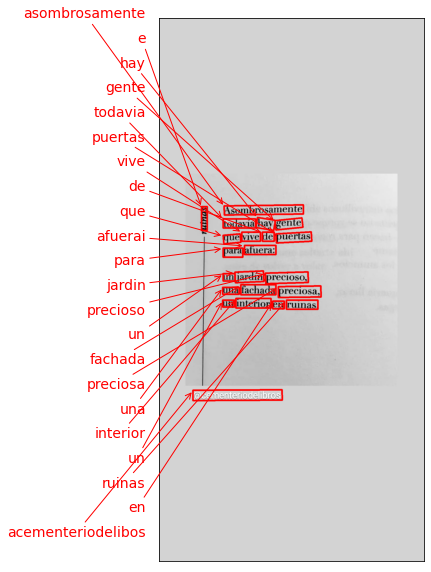

In [48]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))
if(len(custom_images) == 1):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

In [49]:
with open('results.txt', 'a+') as f:
  for idx, prediction in enumerate(predictions):
    if(idx != 0):
      print("\n")
      f.write("\n\n")
    print("Results for the file: " + os.path.basename(custom_images[idx]))
    f.write("Results for the file: " + os.path.basename(custom_images[idx]) + ":\n\n")
    for word, array in prediction:
      if word == "\n":
        print("\n")
        f.write("\n")
      else:
        print(word,  end = ' ')
        f.write(word + " ")

Results for the file: p_1.png
asombrosamente e todavia hay gente vive de puertas que afuerai para jardin precioso un fachada preciosa una interior un ruinas en acementeriodelibos 

## References
The code above was extracted from: 
https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/keras_ocr_custom.ipynb#scrollTo=jOGNe4wiIQHN